In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from path import Path
import matplotlib.pyplot as plt

In [2]:
# Loading data
file_path = Path("../Cleaned_Data/2008-2020_tornadoes_EF_cleaned.csv")
tornado_df = pd.read_csv(file_path)
tornado_df

,Year,Month,Day,Timestamp,State,State_Fips,County_Fips,Start_Lat,Start_Lon,End_Lat,End_Lon,EF,Injuries,Fatalities,Loss,Crop_Loss,Length,Width
0,2008,10,11,2008-10-11 18:33:00,NM,35,49,35.1500,-105.9400,0.0000,0.0000,0,0,0,12000.0,NaN,0.02,10
1,2008,10,11,2008-10-11 21:54:00,KS,20,181,39.3300,-101.5500,0.0000,0.0000,0,0,0,NaN,NaN,0.25,10
2,2008,10,24,2008-10-24 16:55:00,GA,13,39,31.0200,-81.8100,0.0000,0.0000,0,0,0,1000.0,NaN,0.25,25
3,2008,10,6,2008-10-06 13:46:00,AR,5,113,34.5800,-94.1500,34.6300,-94.1200,1,0,0,75000.0,NaN,3.41,250
4,2008,10,6,2008-10-06 16:05:00,TX,48,67,33.0700,-94.1000,33.0900,-94.0800,0,0,0,75000.0,NaN,1.50,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15886,2020,9,1,2020-09-01 16:24:00,TN,47,95,36.3290,-89.4981,36.3517,-89.4729,0,0,0,NaN,2000.0,2.10,50
15887,2020,9,3,2020-09-03 15:57:00,MD,24,3,38.9480,-76.5695,38.9233,-76.4615,0,0,0,1250000.0,NaN,6.05,100
15888,2020,9,5,2020-09-05 16:17:00,CA,6,39,37.3500,-119.3400,37.5218,-119.3056,2,0,0,NaN,NaN,12.02,50
15889,2020,9,5,2020-09-05 18:29:00,CA,6,19,37.2500,-119.2000,37.2598,-119.1838,1,0,0,NaN,NaN,1.12,25


In [3]:
tornado_df.columns

Index(['Year', 'Month', 'Day', 'Timestamp', 'State', 'State_Fips',
       'County_Fips', 'Start_Lat', 'Start_Lon', 'End_Lat', 'End_Lon', 'EF',
       'Injuries', 'Fatalities', 'Loss', 'Crop_Loss', 'Length', 'Width'],
      dtype='object')

In [4]:
# drop na columns
tornado_df = tornado_df.dropna()

## Machine Learning

In [5]:
# Import Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Random Forest -- feature importance

This algorithm takes inputs (Injuries EF Length	Width) to predict (Fatalities)

#### 1. Define input data (X) and output data (y)

In [6]:
X = tornado_df.copy()
X = X.drop(['Year', 'Month', 'Day', 'Timestamp','State','Start_Lat','Start_Lon','End_Lat', 'End_Lon','Crop_Loss', 'Fatalities','Injuries','State_Fips','County_Fips'], axis=1)
X

,EF,Loss,Length,Width
22,1,510000.0,8.13,200
28,2,500000.0,4.09,150
29,3,1000000.0,8.19,100
73,1,350000.0,10.59,500
81,1,20000.0,3.14,250
...,...,...,...,...
15764,0,20000.0,1.26,50
15785,1,35000.0,0.26,50
15786,1,45000.0,2.17,100
15838,0,150000.0,2.58,100


In [7]:
y = tornado_df["Fatalities"].ravel()
y[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### 2. Splitting into Train and Test sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### 3. Scale the input data (X)

In [9]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### 4. Fitting the Random Forest Model

In [10]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500,random_state=78)

In [11]:
 # Fitting the model
model = rf_model.fit(X_train_scaled, y_train)

#### 5. Making Predictions Using Random Forest Model

In [12]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0], dtype=int64)

#### 6. Model Evaluation

In [13]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

In [16]:
cm_df = pd.DataFrame(cm, 
                     index=["Actual 0", "Actual 1","Actual 2", "Actual 3","Actual 4"], 
                     columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3","Predicted 4"]
                    )
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [17]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 0,155,0,0,0,0
Actual 1,2,0,0,0,0
Actual 2,1,0,0,0,0
Actual 3,0,0,1,0,0
Actual 4,0,0,0,0,1


Accuracy Score : 0.975
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       155
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1

    accuracy                           0.97       160
   macro avg       0.40      0.40      0.40       160
weighted avg       0.96      0.97      0.97       160



C:\Users\Nat\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nat\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nat\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 7. Rank the Importance of Features

In [18]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_

In [19]:
# We can sort the features by their importance.
feature_sort = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
feature_sort

[(0.29674685947380935, 'Length'),
 (0.2750759481523271, 'Loss'),
 (0.2368962216787647, 'EF'),
 (0.19128097069509892, 'Width')]

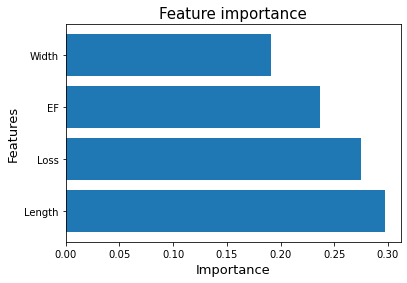

In [20]:
# Plot Feature Importance
features_sorted = []
importance_sorted = []

for i in feature_sort:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]

plt.title("Feature importance", fontsize=15)
plt.xlabel("Importance", fontsize=13)
plt.ylabel("Features", fontsize=13)

plt.barh(range(len(importance_sorted)), importance_sorted,)
plt.yticks(range(len(importance_sorted)), features_sorted);